<a href="https://colab.research.google.com/github/filipemagarotto/projeto_cenipa/blob/master/projeto_cenipa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Variável de análise: <font color='Lime'>tipo</font>**

In [ ]:
import pandas as pd 
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np 
import statistics as sts

cenipaOcorrencias = pd.read_csv("/content/ocorrencias_cenipa.csv", sep = ';', encoding='ISO-8859-1')
cenipaOcorrencias.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


## <font color='Tomato'><b>Gráfico</b></font>

Text(0.5, 1.0, 'Tipos de acidentes')

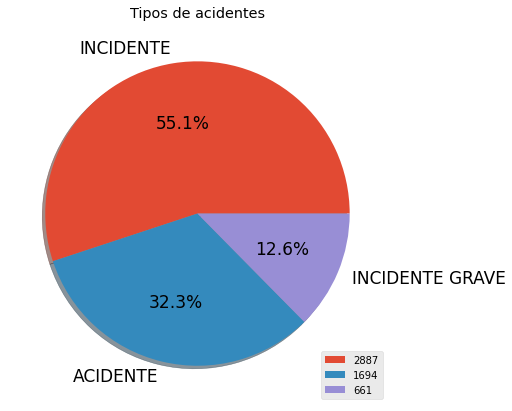

In [ ]:
# Somando quantas vezes cada tipo aparece.
dadosCount = cenipaOcorrencias.groupby('tipo')['codigo'].count().sort_values(ascending=[False])

# Gráfico
grafico = cenipaOcorrencias['tipo'].value_counts().plot(kind='pie', label="", fontsize = 17, shadow=True, autopct='%1.1f%%',figsize=(7,7))

grafico.legend(dadosCount)
grafico.set_title("Tipos de acidentes")

## <font color='Tomato'><b>Explicação</b></font>

Primeiramente, vamos distinguir a diferença entre ACIDENTE e INCIDENTE.

Podemos dizer que ambos são eventos imprevistos, tendo como principal característica o nível de dano. Enquanto o acidente a vítima sofre lesões (seja leves ou graves), no incidente não há lesão. Mas, claro, o incidente tem potencial para se tornar um acidente.

Vamos a alguns exemplos práticos de acidentes:

- Tragédia aéreo de Tenerife, considerado como o maior acidente aéreo da história, onde duas aeronaves modelo Boeing 747 se chocaram na pista do Aeroporto de Tenerife Norte, nas Ilhas Canárias, em 1977. Este acidente ocasionou a morte de 583 pessoas.

- O Voo da Air India que foi destruído quando fazia a jornada sobre o oceano atlântico, em 23 de junho de 1985, ao ocorrer uma explosão no compartimento de carga que causou uma rápida descompressão matando 329 pessoas.

Exemplo de incidente aéreo:

- FALHA DO MOTOR EM VOO: O problema ocorreu no Aeroporto Internacional Allama Iqbal, de Lahore, no Paquistão. Durante a aceleração pela pista 36L a tripulação rejeitou a decolagem devido a uma falha no motor esquerdo. A aeronave diminuiu a velocidade com segurança, mas terminou com alguns dos pneus do trem de pouso principal completamente murchos.

Vemos neste gráfico de pizza um terceiro elemento: INCIDENTE GRAVE. Que seria
esta variável?
Definido pela própria ANAC (Agência Nacional de Aviação Civil) “Incidente
aeronáutico envolvendo circunstâncias que indiquem que houve elevado potencial
de risco de acidente relacionado à operação de uma aeronave tripulada, havida
entre o momento em que uma pessoa nela embarca com a intenção de realizar um
voo, até o momento em que todas as pessoas tenham dela desembarcado.”


## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
tipos = cenipaOcorrencias['tipo']
tipoCount = tipos.value_counts()

print('+-----------------------------+')
print('| Média => ', round(tipoCount.mean(), 2))
print('| Moda => ', sts.mode(tipos))
print('| Mediana => ', sts.median(tipoCount))
print('| Desvio padrão => ', round(sts.stdev(tipoCount)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  1747.33
| Moda =>  INCIDENTE
| Mediana =>  1694
| Desvio padrão =>  1114
+ ----------------------------+


# **Variável de análise: <font color='Lime'>hora</font>**

## <font color='Tomato'><b>Gráfico</b></font>

In [ ]:
# todas as horas
horas = []

# separando por períodos
madrugadaList = [] # 00h - 5:59
manhaList = [] # 06 - 11:59
tardeList = [] # 12 - 17:59
noiteList = [] # 18 - 23:59

def setHours():
  HorasMinutos = []

  for i in cenipaOcorrencias['hora']:
    HorasMinutos.append(i.split(sep=":", maxsplit=1))

  for n in HorasMinutos:
    horas.append(n[0])

def setGroups():
  for h in horas:
    if(h == '00' or h == '01' or h == '02' or h == '03' or h == '04' or h == '05'):
      madrugadaList.append(h)
    elif(h == '06' or h == '07' or h == '08' or h == '09' or h == '10' or h == '11'):
      manhaList.append(h)
    elif(h == '12' or h == '13' or h == '14' or h == '15' or h == '16' or h == '17'):
      tardeList.append(h)
    elif(h == '18' or h == '19' or h == '20' or h == '21' or h == '22' or h == '23'):
      noiteList.append(h)

# callout do primeiro método: separar somente as horas, descartando, portanto, os minutos.
setHours()
# separando cada hora no seu devido período
setGroups()

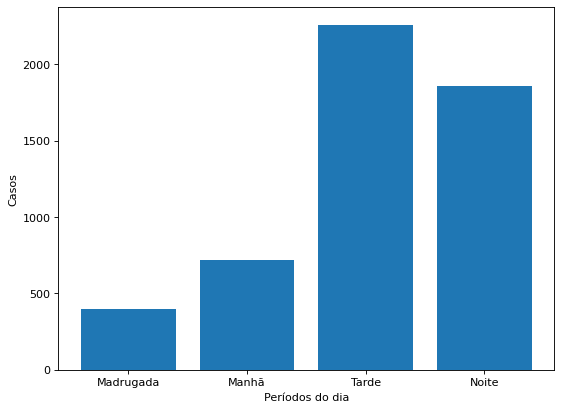

In [ ]:
# necessário a inserção manual, pois não temos essas informações
grupos = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
valores = [len(madrugadaList), len(manhaList), len(tardeList), len(noiteList)]

# Gráfico
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(grupos, valores)
plt.xlabel('Períodos do dia', color='black', )
plt.ylabel('Casos', color='black')
plt.grid(False)
plt.show()

## <font color='Tomato'><b>Explicação</b></font>

<font color="Gold"><b>O risco dos corujões (voos de madrugada)</b></font><br><br>

De acordo com pesquisas, os pilotos erram quase 50% a mais nos voos de
madrugada do que nas demais horas do dia. No turno da madrugada, pilotos
cometem 9,5 erros de nível 3 (o mais perigoso para a segurança da aeronave) a
cada 100 horas de voo. Em outros horários, a probabilidade de erros graves cai pela
metade. De manhã, a tarde e à noite, por exemplo, a frequência desse tipo de falha
baixa para algo em torno de 6,5 erros a cada 100 horas no ar.<br><br>

Estudos analisaram erros de nível 3 cometidos por 987 pilotos durante seis meses.
Neste período, foram contabilizadas 155,337 horas de voo e, dentre as 1,065 falhas
constatadas, não houve registro de acidentes com vítimas entre as grandes
empresas aéreas do país.<br><br>

Apesar de preocupantes, as conclusões da pesquisa não devem ser vistas com
alarmismo, pois a grande maioria dos erros é neutralizada por manobras corretivas e
nem sempre redunda em acidentes, sendo inclusive imperceptível aos passageiros.<br><br>

A maior incidência de procedimentos inadequados durante a madruga não foi uma
surpresa para os cientistas. Pois, a exemplo dos caminhoneiros, motoristas de
ônibus e outros profissionais que trabalham durante esse horário, os pilotos de avião
são obrigados a passar horas a fio em um momento do dia em que seu organismo
deveria estar descansando. Isso acontece por conta do ritmo circadiano do corpo,
que é desestruturado com: cansaço, sonolência, estresse e mau humor. Enfim, uma
sucessão de fatores que elevam o risco do erro humano em qualquer área de
atuação. Na aviação, cujos acidentes graves são em cerca de 80% dos casos por
causa de falhas humanas, não é diferente.<br><br>

“O trabalho noturno faz os pilotos desempenharem tarefas num momento em que
deveriam estar descansando e o aumento no índice de erros é da mesma ordem que
já encontramos em motoristas de ônibus e de caminhão”, afirma Marco Túlio de
Mello, coordenador do Cemsa e dos estudos com pilotos de avião.<br><br>

Mas, não é só o cansaço físico que predispõe a falhas operacionais. O desgaste de
trabalhar entre turnos alternados, dormir fora de casa e longe da família com
frequência também mina o equilíbrio psicológico dos pilotos.<br><br>

Em outro estudo, os pesquisadores do Cemsa constataram que o humor dos
comandantes que trabalham entre meia-noite e seis horas encontra-se debilitado em
relação ao estado de espírito dos que pegam no manche nos outros períodos do dia.<br><br>

“Sua capacidade cognitiva está abaixo do normal, aumentando a probabilidade de
ocorrerem acidentes por falha humana na madrugada”, diz Mello.<br><br>

O estudo colheu informações de 91 pilotos de linhas comerciais que operam no
Brasil, todos com pelo menos dez anos de profissão e que voam em proporções
parecidas tanto de dia, quanto de noite. Os comandantes responderam um
questionário formulado por um instrumento de pesquisa originalmente concebido
para medir o estado psicológico de atletas que participam de competições, a Escala
de Humor do Brasil (Brams). A metodologia abrange 24 itens e mensura seis tópicos
relacionados ao humor. Em cinco deles (tensão, depressão, raiva, vigor e fadiga), o
desempenho dos comandantes que voam durante a madrugada é pior do que os
que voam em outros períodos. Apenas num quesito (confusão mental), que mede o 
controle emocional e o nível de atenção, o índice foi o mesmo para todos. De acordo
com os pesquisadores, esse último dado sinaliza que, mesmo cansados, os
comandantes dos voos corujões conseguem se manter alerta.<br><br>

Os dados citados fazem parte de um estudo feito por pesquisadores do Centro de
Estudo Multidisciplinar em Sonolência e Acidentes (Cemsa) e Departamento de
Psicobiologia da Universidade Federal de São Paulo (Unifesp). O trabalho foi
publicado em dezembro de 2009 na revista científica Brazilian Journal of Medical
and Biological Research.<br><br>

Mas, se os voos de madrugada apresentam mais chances de erros humanos, por
que no gráfico mostrado no início do artigo acontecem mais acidentes durante os
outros períodos do dia? Bom, a resposta é simples, a quantidade de voos durante
manhã, tarde e noite são superiores as de madrugada. E como citado nos dados
acima, a grande maioria dos erros é corrigido com manobras corretivas, ou seja,
nem todos acabam em acidentes.<br><br>

<font color="Gold"><b>Quais são os melhores horários para viajar? (Em relação a segurança)</b></font><br><br>


Como a maioria das pessoas devem saber, a maioria dos acidentes e incidentes de
avião acontecem por falhas humanas, e não por falhas da aeronave em si, dito isso,
não podemos afirmar com precisão se existe um horário "mais seguro" para viajar,
porém, alguns dos dados a seguir podem ser levados em consideração para quem
prefere apostar nas probabilidades.<br><br>

- Estudos nos EUA indicam que voos de manhã têm menos probabilidade de
atrasos do que os voos à tarde e à noite, o que permite ao piloto conduzir a
viagem com mais tranquilidade;<br><br>
- Estudos nos EUA indicam que voos de manhã têm menos probabilidade de
atrasos do que os voos à tarde e à noite, o que permite ao piloto conduzir a
viagem com mais tranquilidade;<br><br>
- De acordo com pesquisas, os pilotos erram quase 50% a mais nos voos de
madrugada do que nas demais horas do dia.<br><br>

- No turno da madrugada, pilotos cometem 9,5 erros de nível 3, logo, para
quem prefere confiar em estatísticas, os outros horários seriam mais
favoráveis.<br><br>

<font color="Gold"><b>FATOS CURIOSOS (Bônus)</b></font><br><br>

Um piloto dormir no manche do avião é uma cena muito mais rara do que um
motorista de ônibus ou caminhão cochilar no volante. Mas pode acontecer, aqui vão
alguns casos:<br><br>

<font color='LightCyan'><b>Caso Cessna 208B (Cairns - Redcliffe) / julho 2020</b></font><br>
Em julho de 2020, um experiente piloto australiano pegou no sono enquanto voava e
foi parar a 100 quilômetros do seu destino, revelou uma investigação do ATSB
(Australian Transport Safety Bureau). O relatório comenta que, naquele dia, o
controle de tráfego aéreo tentou fazer contato com o piloto, mas ficaram 40 minutos
sem resposta.<br><br>

Após todas as tentativas de contato falharem, o controlador solicitou que outro avião
interceptasse o Caravan. Um piloto se prontificou e realizou a missão, mas nem
assim conseguiu chamar atenção.<br><br>

Apenas depois do avião voar mais de 110 quilômetros além de seu destino
pretendido que o piloto acordou e fez contato. Loucura, né?!<br><br>

O relatório ainda completou que o piloto parecia "grogue" e "não muito lúcido"
quando acordou, e mais tarte o mesmo relatou se sentir confuso ao iniciar a descida.
No fim das contas, o piloto pousou sem muitos problemas.<br><br>

Caso Go! Airlines (Honolulu – Hilo, Havaí) / fevereiro 2007
Em fevereiro de 2007, os comandantes de um voo da Go! Airlines que saiu de
Honolulu às 21h15 com destino a Hilo, no Havaí, um trajeto que dura normalmente
meia hora, dormiram por quase 20 minutos na cabine. <br><br>

A despeito dos insistentes contatos do pessoal da torre de controle e de outros
aviões nas redondezas, eles passaram direto pelo aeroporto onde deveriam pousar 
e só despertaram 50 quilômetros adiante. Para sorte dos 40 passageiros a bordo da
aeronave, os pilotos acordaram a tempo de dar meia-volta e aterrar o jato com
segurança.<br><br>

<font color='LightCyan'><b>Caso Air Índia (Dubai-Jaipur-Mumbai) / junho 2008</b></font><br>
Em junho de 2008, um episódio semelhante aconteceu com um avião da Air Índia
com cem passageiros, que fazia, durante a madrugada, a rota Dubai-Jaipur-Mumbai.
Exaustos, os pilotos cerraram os olhos na cabine, ignoraram por completo o
aeroporto de Mumbai, seu destino, e foram despertados de seu sono profundo mais
de 500 quilômetros adiante por uma espécie de aviso sonoro enviado por rádio pelos
controladores de voo.<br><br>

<b>As três histórias tiveram finais felizes, mas são um alerta de que não levar em
conta o relógio biológico dos pilotos aumenta os riscos de acidente.</b><br><br>

<b>Glossário</b><br>
Erros de nível 3: são aqueles que ultrapassam os limites operacionais de segurança
definidos como padrão internacional, como por exemplo, virar o manche do avião
numa angulação superior à recomendada, ou ignorar procedimentos especificados
como padrão para a utilização do jato.

## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
# count: contagem das observações
# mean: média
# std: desvio padrão
# min: mínimo
# 25%: quartil Q1 (até 25%)
# 50%: quartil Q2 (até 50%)
# 75%: quartil Q3 (até 75%)
# max: máximo

dataframe_periodos = pd.DataFrame({'Valores':valores})
dataframe_periodos.describe().round(2)

,Valores
count,4.0
mean,1310.5
std,891.6
min,399.0
25%,640.5
50%,1291.0
75%,1961.0
max,2261.0


# **Variável de análise: <font color='Lime'>ocorrencia_saida_pista</font>**

## <font color='Tomato'><b>Gráfico</b></font>

Text(0.5, 1.0, 'Saída Pista')

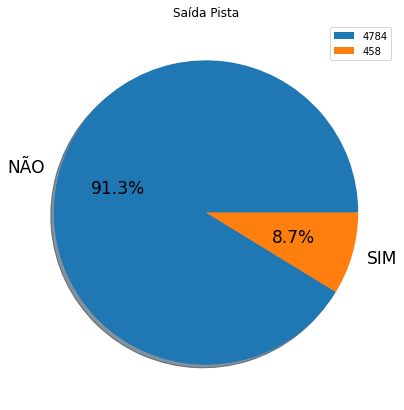

In [ ]:
# Somando quantas vezes cada tipo aparece.
dados_group_saidapista = cenipaOcorrencias.groupby('ocorrencia_saida_pista')['codigo'].count().sort_values(ascending=[False])

# Gráfico
grafico = cenipaOcorrencias['ocorrencia_saida_pista'].value_counts().plot(kind='pie', label="", fontsize = 17, shadow=True, autopct='%1.1f%%',figsize=(7,7))

grafico.legend(dados_group_saidapista)
grafico.set_title("Saída Pista")

## <font color='Tomato'><b>Explicação</b></font>

Nesse módulo vamos constatar as causas e a quantidade de incidentes com o
devido tema.<br>
Ao longo dos anos podemos ver inúmeras ocorrências áreas sendo ela acidentes de
fato ou incidentes, e é claro isso nos assusta, não é mesmo?<br><br>

Podemos ver através de números que os casos de saída de pista são mínimos
comparado a quantidade de voos realizados durante todos os anos.
Os principais motivos causadores são: anomalias na aeronave, condições de pista
(óleo, outros motivos no asfalto), aquaplanagem e condições de visão do piloto, no
qual pode levar a uma falta de cálculo de pista.<br><br>

Por fim, vimos que apesar de não ser algo tão devastador e com grande frequência,
essa ocorrência acontece e gera um grande desconforto aos passageiros e
tripulantes da aeronave, assim, como ao aeroporto por sua interdição.

## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
ocorrencia_spista = cenipaOcorrencias['ocorrencia_saida_pista']
ocorrencia_spista_count = ocorrencia_spista.value_counts()

print('+-----------------------------+')
print('| Média => ', round(ocorrencia_spista_count.mean(), 2))
print('| Moda => ', sts.mode(ocorrencia_spista))
print('| Mediana => ', sts.median(ocorrencia_spista_count))
print('| Desvio padrão => ', round(sts.stdev(ocorrencia_spista_count)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  2621.0
| Moda =>  NÃO
| Mediana =>  2621.0
| Desvio padrão =>  3059
+ ----------------------------+


# **Variável de análise: <font color='Lime'>estado</font>**

## <font color='Tomato'><b>Gráfico</b></font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f285899c090>],
      dtype=object)

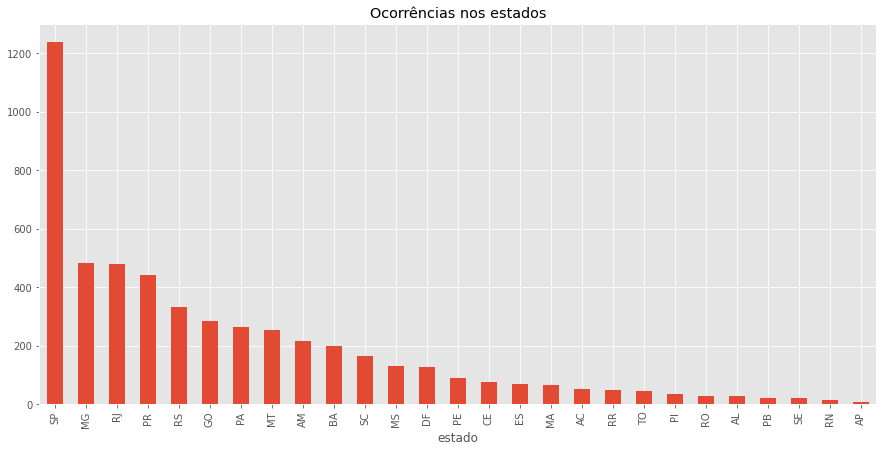

In [ ]:
# São Paulo, por ter a maior quantidade de aeronaves, consequentemente também tem o maior número de incidentes
porEstado = cenipaOcorrencias.groupby('estado')['codigo'].count().sort_values(ascending=[False])
porEstado

# Plotando a quantidade de ocorrências por estado em gráfico
plt.style.use("ggplot")
porEstado.plot(kind='bar', subplots=True, label="Ocorrências nos estados" ,figsize=(15, 7))

## <font color='Tomato'><b>Explicação</b></font>

Nesta seção, vamos explicar e mostrar gráficos com dados sobre os acidentes e
incidentes nos estados, no gráfico acima mostramos alguns dados.<br><br>

Claramente, São Paulo acaba ficando na frente dos outros estados, mas isso tem
seus motivos.<br><br>
São Paulo foi o estado com mais visitas de turistas em 2018 e 2019 de acordo com o
Anuário Estatístico de Turismo que foi desenvolvido pela Coordenação Geral de
Dados e informações do Ministério do Turismo, sem contar que os aeroportos de
São Paulo aparecem entre os 10 aeroportos mais movimentados do Brasil, sendo
que em primeiro é o de Guarulhos, São Paulo também possui o maior aeroporto do
país (Aeroporto Internacional de São Paulo).<br><br>
Com estes dados, podemos entender que São Paulo é o estado com maior número
de voos, o que influencia e faz com que o número de acidentes ou incidentes seja
maior em comparação aos demais.

## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
estados = cenipaOcorrencias['estado']
estados_count = estados.value_counts()

print('+-----------------------------+')
print('| Média => ', round(estados_count.mean(), 2))
print('| Moda => ', sts.mode(estados))
print('| Mediana => ', sts.median(estados_count))
print('| Desvio padrão => ', round(sts.stdev(estados_count)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  194.15
| Moda =>  SP
| Mediana =>  90
| Desvio padrão =>  255
+ ----------------------------+


# **Variável de análise: <font color='Lime'>ano</font>**

## <font color='Tomato'><b>Gráfico</b></font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28589e7c50>],
      dtype=object)

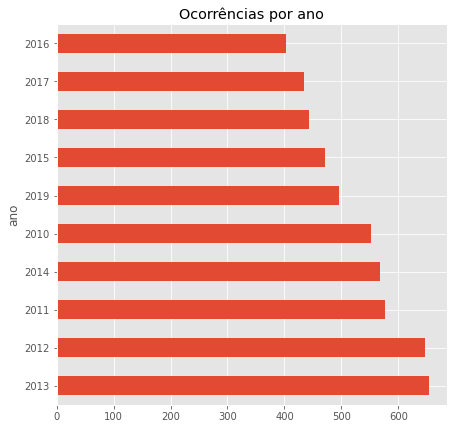

In [ ]:
porAno = cenipaOcorrencias.groupby('ano')['codigo'].count().sort_values(ascending=[False])
porAno

# Plotando a quantidade de ocorrências por ocorrências por ano
plt.style.use("ggplot")
porAno.plot(kind='barh', subplots=True, label="Ocorrências por ano" ,figsize=(7, 7))

## <font color='Tomato'><b>Explicação</b></font>

No gráfico acima, mostram os anos de 2010 até 2019 com dados sobre os
acidentes e incidentes ocorridos.<br><br>

Podemos ver que em 2012, o país sofreu com um aumento elevado se comparado a
<font>2011</font>. Por conta disso as autoridades fizeram campanhas e estratégias para que em
2013 o aumento fosse amenizado, o que funcionou teoricamente, porém, não foi o
suficiente para que diminuísse em números de acidentes e incidentes gerais em
relação ao ano anterior

## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
anos = cenipaOcorrencias['ano']
anos_count = anos.value_counts()

print('+-----------------------------+')
print('| Média => ', round(anos_count.mean(), 2))
print('| Moda => ', sts.mode(anos))
print('| Mediana => ', sts.median(anos_count))
print('| Desvio padrão => ', round(sts.stdev(anos_count)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  524.2
| Moda =>  2013
| Mediana =>  524.0
| Desvio padrão =>  88
+ ----------------------------+


# **Variável de análise: <font color='Lime'>aeronave_liberada</font>**

## <font color='Tomato'><b>Gráfico</b></font>

Text(0.5, 1.0, 'Aeronave Liberada')

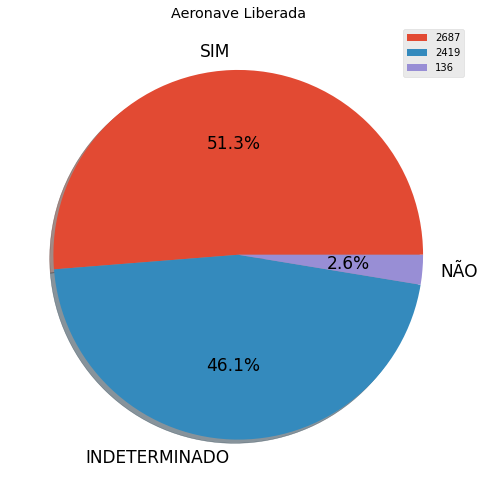

In [ ]:
# Dados em números na parte Externa
aeronav_lib_count = cenipaOcorrencias.groupby('aeronave_liberada')['codigo'].count().sort_values(ascending=[False])

# Gráfico
grafico = cenipaOcorrencias['aeronave_liberada'].value_counts().plot(kind='pie', label="", fontsize = 17, shadow=True, autopct='%1.1f%%',figsize=(8.5,8.5))

grafico.legend(aeronav_lib_count)
grafico.set_title("Aeronave Liberada")

## <font color='Tomato'><b>Explicação</b></font>

Neste tópico falaremos sobre as aeronaves liberadas para voo após os acidentes
envolvidos.<br><br>
[Podemos afirmar que desastres aéreos são raros e, quando acontecem, tem como
causa fatores que não se repetem pois tudo que se aprende com a queda de uma
aeronave é usado para evitar outra tragédia igual]<br><br>
No gráfico acima, de acordo com os dados do CENIPA, podemos analisar que
51,3% são de aeronaves que foram liberadas para voo por estarem em boas
condições de uso e seguras para voltar as rotas aéreas.<br><br>
Entretanto 2,6% é a taxa de aeronaves que foram barradas de voltar a voar por não
terem condições especificas para realizar os voos.<br><br>
A taxa indeterminada de 46,1% seria os aviões onde a perícia não conseguiu
localizar ou que não tinham caixa preta ou até mesmo aviões voando
clandestinamente.<br><br>

Um exemplo de aeronave liberada recentemente que se envolveu em acidentes em
Novembro de 2018 e Março de 2019 é a Boeing 737 Max, em um curto intervalo de 
4 meses dois desses modelos sofreram acidentes matando 189 pessoas no mar da
Indonésia na primeira queda e 157 na Etiópia na segunda queda, as quedas foram
causadas por um erro de software chamado Mcas, o sistema impede que o jato
aumento seu ângulo de ataque, ou melhor dizendo que levante o nariz da aeronave
a ponto de perder a sustentação empurrando para baixo.<br><br>
A aeronave ficou proibida para utilização em 59 países incluindo o Brasil, a proibição
durou 20 meses, o software foi corrigido além da fiação trocada e os pilotos
passaram por treinamento em simuladores específicos, e a aeronave voltou a
circular em 9/12/2020 pela companhia aérea Gol

## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
aeronav_lib = cenipaOcorrencias['aeronave_liberada']
aeronav_lib_counts = aeronav_lib.value_counts()

print('+-----------------------------+')
print('| Média => ', round(aeronav_lib_counts.mean(), 2))
print('| Moda => ', sts.mode(aeronav_lib))
print('| Mediana => ', sts.median(aeronav_lib_counts))
print('| Desvio padrão => ', round(sts.stdev(aeronav_lib_counts)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  1747.33
| Moda =>  SIM
| Mediana =>  2419
| Desvio padrão =>  1402
+ ----------------------------+


# **Variável de análise: <font color='Lime'>aeronave_tipo</font>**

## <font color='Tomato'><b>Gráfico</b></font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2858ae1250>],
      dtype=object)

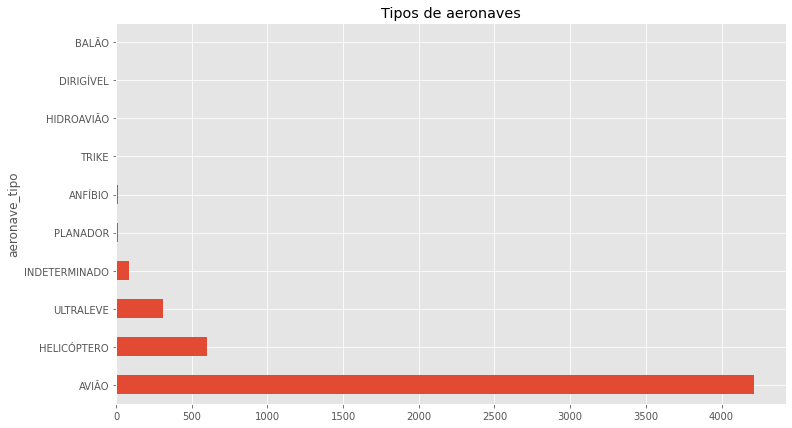

In [ ]:
aeronave_tipo = cenipaOcorrencias.groupby('aeronave_tipo')['codigo'].count().sort_values(ascending=[False])
aeronave_tipo

# Plotando a quantidade de ocorrências por tipos de aeronaves
plt.style.use("ggplot")
aeronave_tipo.plot(kind='barh', subplots=True, label="Tipos de aeronaves" ,figsize=(12, 7))

## <font color='Tomato'><b>Explicação</b></font>

Analisando agora pelos tipos de aeronaves, podemos visualizar na imagem abaixo
que os aviões lideram em relação ao número de acidentes. Esses números foram
registrados entre 2006 3 2017 e registrados pelo Centro de Investigação e
Prevenção de Acidentes Aeronáuticos (CENIPA)<br><br>

Dentre os aviões, os que lideram em relação a acidentes são os de pequeno porte,
que por questões de recursos, manutenção e tecnologia, tendem a ter mais falhas.
Segue abaixo um gráfico que mostra um percentual dessas aeronaves envolvidas
em acidentes, categorizados pelo código ICAO referente ao modelo da aeronave,
registrados entre 2010 e 2019. Nota-se que os modelos de aeronave mais
frequentes em ocorrências desse período foram: IPAN, PA34 e C210, que
representam 30,4% do total de aeronaves envolvidas.<br><br>

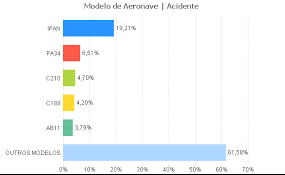



## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
aeronav_tipo = cenipaOcorrencias['aeronave_tipo']
aeronav_tipo_counts = aeronav_tipo.value_counts()

print('+-----------------------------+')
print('| Média => ', round(aeronav_tipo_counts.mean(), 2))
print('| Moda => ', sts.mode(aeronav_tipo))
print('| Mediana => ', sts.median(aeronav_tipo_counts))
print('| Desvio padrão => ', round(sts.stdev(aeronav_tipo_counts)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  524.2
| Moda =>  AVIÃO
| Mediana =>  13.5
| Desvio padrão =>  1311
+ ----------------------------+


# **Variável de análise: <font color='Lime'>status_investigacao</font>**

## <font color='Tomato'><b>Gráfico</b></font>

Text(0.5, 1.0, 'Status Investigação')

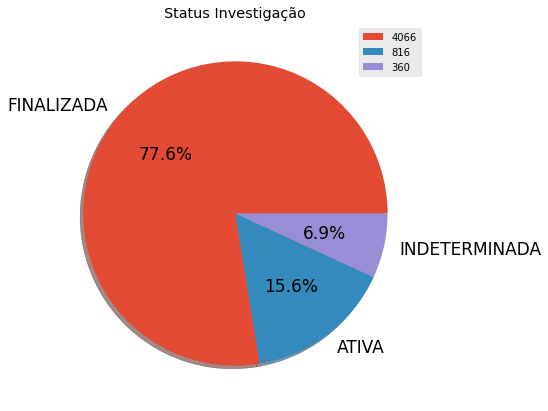

In [ ]:
# Somando quantas vezes cada tipo aparece.
status_invest_count = cenipaOcorrencias.groupby('status_investigacao')['codigo'].count().sort_values(ascending=[False])

# Gráfico
grafico = cenipaOcorrencias['status_investigacao'].value_counts().plot(kind='pie', label="", fontsize = 17, shadow=True, autopct='%1.1f%%',figsize=(7,7))

grafico.legend(status_invest_count)
grafico.set_title("Status Investigação")

## <font color='Tomato'>**Explicação**</font>

Vamos, agora, conhecer as etapas de investigação do CENIPA
Caso ocorra um acidente, o Cenipa agirá em três etapas. Primeiro, a ocorrência
deverá ser advertida e validada. Em seguida, as informações da notificação podem
ser complementadas ou confirmadas. Na terceira etapa, as informações da
ocorrência passam por autenticação.<br><br>

<font color='LightCyan'><b>PRIMEIRO ATO</b></font><br>
Assim que o episódio é advertido como um acidente aeronáutico, primeiramente, o
Cenipa verifica o local do acontecimento. Nessa visita, é preservado os indícios,
coleta novos dados e confirma as informações já recebidas e verifica danos à
aeronave ou provocados por ela.<br><br>


<font color='LightCyan'><b>CAIXA PRETA</b></font><br>
Sendo a responsável por gravar todo o áudio captado na cabine de comando do
avião, o centro de investigações da Aeronáutica também é responsável pelos dados
de gravação do voo armazenados na caixa-preta.<br><br>

<font color='LightCyan'><b>DESTROÇOS</b></font><br>
Após a coleta de informações necessárias é feita no local do acidente, é liberado a
investigação policial. É recomendado que nenhum objeto seja retirado de dentro da
aeronave, exceto pelos casos de resgate.<br><br>

<font color='LightCyan'><b>RELATÓRIO</b></font><br>
Ao concluir a investigação, um relatório é feito com o intuito de precaver futuros
acontecimentos. Lembrando que este documento não visa acusar alguém e que não
seja usado, caso houver, eventos judiciais.<br><br>

<font color='LightCyan'><b>RECOMENDAÇÃO</b></font><br>
Por fim, é direcionado advertências de seguranças.


## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
status_invest = cenipaOcorrencias['status_investigacao']
status_invest_counts = status_invest.value_counts()

print('+-----------------------------+')
print('| Média => ', round(status_invest_counts.mean(), 2))
print('| Moda => ', sts.mode(status_invest))
print('| Mediana => ', sts.median(status_invest_counts))
print('| Desvio padrão => ', round(sts.stdev(status_invest_counts)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  1747.33
| Moda =>  FINALIZADA
| Mediana =>  816
| Desvio padrão =>  2021
+ ----------------------------+


# **Variável de análise: <font color='Lime'>motor_tipo</font>**

## <font color='Tomato'><b>Gráfico</b></font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f285885ce50>],
      dtype=object)

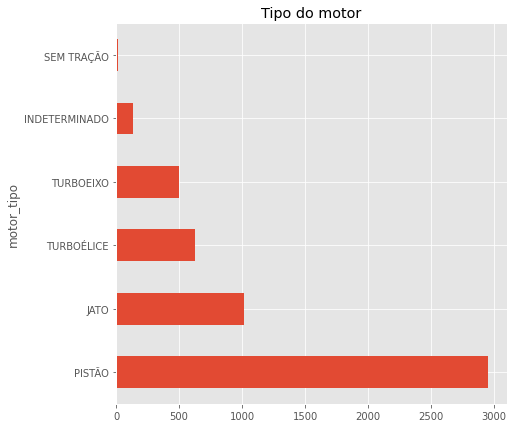

In [ ]:
motor_tipo = cenipaOcorrencias.groupby('motor_tipo')['codigo'].count().sort_values(ascending=[False])
motor_tipo

# Plotando a quantidade de ocorrências por tipo do motor
plt.style.use("ggplot")
motor_tipo.plot(kind='barh', subplots=True, label="Tipo do motor" ,figsize=(7, 7))

## <font color='Tomato'>**Explicação**</font>

As estatísticas do (CENIPA - Centro de Investigação e Prevenção de Acidentes
Aeronáuticos-aéreos) possuem uma alta incidência de falhas de motores. Os modelos
convencionais que equipam pequenas aeronaves, a conclusão entre mecânicos é que
motores a pistão emitem sinais de panes que estão por vir.<br><br>

<font color='Gold'><b>Como funciona o modelo PISTÃO</b></font><br><br>

Esse tipo de motor aproveita a energia da expansão dos gases gerados pela queima
da mistura ar-combustível no seu interior para impulsionar um pistão que se move em
rotação, por meio de uma biela acoplada a um eixo de manivelas. A combustão
geradora de energia é resultado da mistura de gases ou partículas divididas com o ar
em uma porcentagem bem determinada, propagando-se a certa velocidade.<br>
Fonte: https://www.chamoneaviacao.com.br/jato-turboelice-ou-pistao-saiba-comoescolher-sua-aeronave/<br><br>

<font color='Gold'><b>Por que ocorre tantos acidentes e como evitar?</b><font><br><br>

A origem das falhas do modelo é fácil de entender. Dentro dos motores existe um
grande risco de desgaste nas peças. Partes mecânicas que se atritam são fabricadas
em diversos tipos de metal.<br><br>
Se por algum motivo a fricção entre as partes não for mantida a níveis baixos, os
metais começam a se decompor. Basicamente, são duas as grandes áreas de
desgaste. A primeira é o volume interno do bloco. Lá estão o eixo de manivelas e o
eixo de comando de válvulas.<br><br>

O mesmo pode acontecer com o eixo de comando de válvulas. Instalado na parte mais
alta do motor. O mesmo pode acontecer com o eixo de comando de válvulas. Instalado
na parte mais alta do motor. Na medida em que esse eixo se desgasta, suas
dimensões se reduzem e as válvulas deixam de ser abertas na amplitude necessária. <br><br>

Então, o volume de combustível a entrar é reduzido e a mistura já queimada tem
dificuldades em sair para o escapamento.<br><Br>

Em qualquer um dos casos, o motor começa a perder força e desempenho o que
acaba dificultando o trabalho do piloto e por muitas das vezes ocasionando em um
acidente.<br><Br>

<font color='Gold'><b>Para evitar complicações e cuidar do modelo pistão</b></font><br><br>

Importante ficar atento aos sinais que o pistão vem dando sobre problemas, alguns
exemplos são: Vibrações excessivas, funcionamento áspero, falhas ocasionais e a cor
interna dos escapamentos podem significar sintomas de que algo não anda bem. Ou
seja, o operador tem como acompanhar a saúde de um motor.<br><br>

Algumas recomendações do fabricante é: Necessário voar ao menos uma hora por
mês/uma hora por semana. A troca de óleo é de suma importância para o
equipamento, ou seja, independente do uso da aeronave, o óleo deve ser substituído
em, no máximo, <b>quatro meses.</b><br><br>

Fundamental se assegurar que o piloto saiba e cumpra os procedimentos para evitar
o CHT elevado, como corrigir corretamente a mistura para o regime de potência
empregado na altitude que se pretenda voar.<br><br>

Porém, procedimentos corretos fazem elevar a carga de trabalho do piloto. Este, por
sua vez, só pode monitorar o CHT se a aeronave possuir sensores de temperatura.
Mas a maior parte delas não tem. Isso explica a grande ocorrência de panes em
motores de aeronaves antigas.



## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
var_motor_tipo = cenipaOcorrencias['motor_tipo']
motor_tipo_counts = var_motor_tipo.value_counts()

print('+-----------------------------+')
print('| Média => ', round(motor_tipo_counts.mean(), 2))
print('| Moda => ', sts.mode(var_motor_tipo))
print('| Mediana => ', sts.median(motor_tipo_counts))
print('| Desvio padrão => ', round(sts.stdev(motor_tipo_counts)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  873.67
| Moda =>  PISTÃO
| Mediana =>  563.0
| Desvio padrão =>  1080
+ ----------------------------+


# **Variável de análise: <font color='Lime'>aeronave_ano_fabricacao</font>**

## <font color='Tomato'><b>Gráfico</b></font>

In [ ]:
# cada variável representa 1 decáda, isto é, deca30: 1930 - 1939
deca30 = []
deca40 = []
deca50 = []
deca60 = []
deca70 = []
deca80 = []
deca90 = []
deca20 = []
deca21 = []

for i in cenipaOcorrencias['aeronave_ano_fabricacao']:
  i = str(i)
  if i != None and i != '0':
    valor = i[-2:]
    valor = int(valor)
    if valor in range(30, 39):
      deca30.append(i)
    elif valor in range(40, 49):
      deca40.append(i)
    elif valor in range(50, 59):
      deca50.append(i)
    elif valor in range(60, 69):
      deca60.append(i)
    elif valor in range(70, 79):
      deca70.append(i)  
    elif valor in range(80, 89):
      deca80.append(i)  
    elif valor in range(90, 99):
      deca90.append(i)
    elif valor in range(10, 19):
      deca21.append(i)
    elif valor in range(0, 9):
      deca20.append(i)

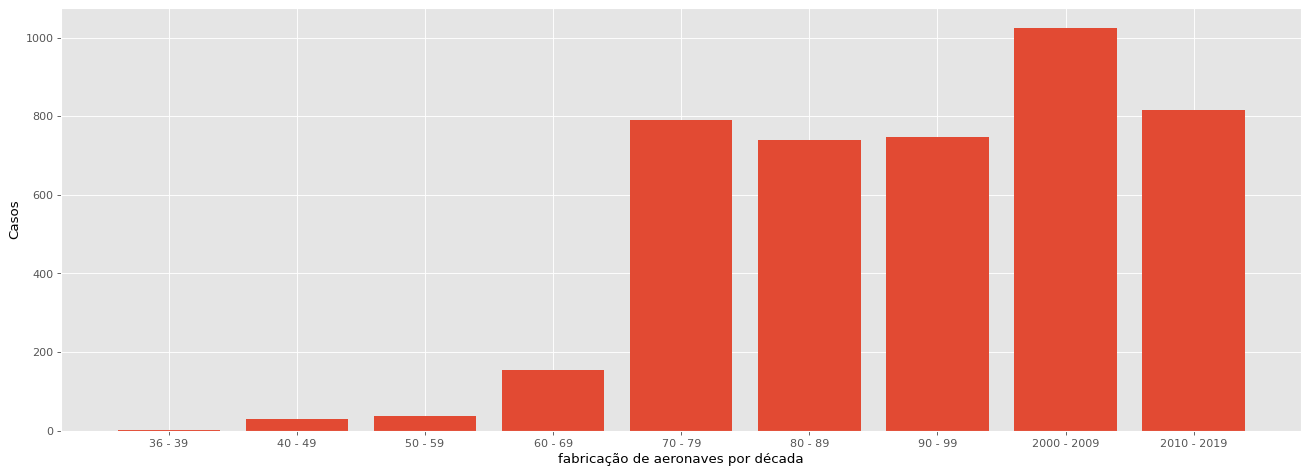

In [ ]:
grupos = ['36 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '2000 - 2009', '2010 - 2019']
valores = [len(deca30), len(deca40), len(deca50), len(deca60), len(deca70), len(deca80), len(deca90), len(deca20), len(deca21)]
plt.figure(figsize=(20, 7), dpi=80)
plt.bar(grupos, valores)
plt.xlabel('fabricação de aeronaves por década', color='black', )
plt.ylabel('Casos', color='black')
plt.grid(True)
plt.show()

## <font color='Tomato'><b>Explicação</b></font>

Neste módulo iremos apresentar o ano de fabricação das aeronaves do devido tema.
Podemos perceber pelo gráfico a seguir que o período de maior número de
aeronaves fabricadas fora entre os anos 2000 e 2009, atingindo seu maior pico com
mais de 1000 fabricações.<br><br>

Se correlacionarmos o gráfico de fabricação de aeronaves com o de ocorrências de
incidentes por anos, percebemos que sua alta ocorreu em 2012 e 2013, pouco
tempo após o pico das fabricações.<br><br>

Podemos perceber que a mudança entre as décadas de 60 para 70 foi uma
mudança “brusca”, e que em diante a tendência foi ter mais aeronaves fabricadas
devido ao avanço da tecnologia e a busca das pessoas por um transporte mais
viável e moderno.

## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
# count: contagem das observações
# mean: média
# std: desvio padrão
# min: mínimo
# 25%: quartil Q1 (até 25%)
# 50%: quartil Q2 (até 50%)
# 75%: quartil Q3 (até 75%)
# max: máximo

list_ano_fabricacao = [len(deca30), len(deca40), len(deca50), len(deca60), len(deca70), len(deca80), len(deca90), len(deca20), len(deca21)]
dataframe_fabricacao = pd.DataFrame({'Valores':list_ano_fabricacao})
dataframe_fabricacao.describe().round(2)

,Valores
count,9.00
mean,482.44
std,414.93
min,2.00
25%,37.00
50%,739.00
75%,790.00
max,1024.00


# **Variável de análise: <font color='Lime'>aeronave_motor_quantidade</font>**

## <font color='Tomato'><b>Gráfico</b></font>

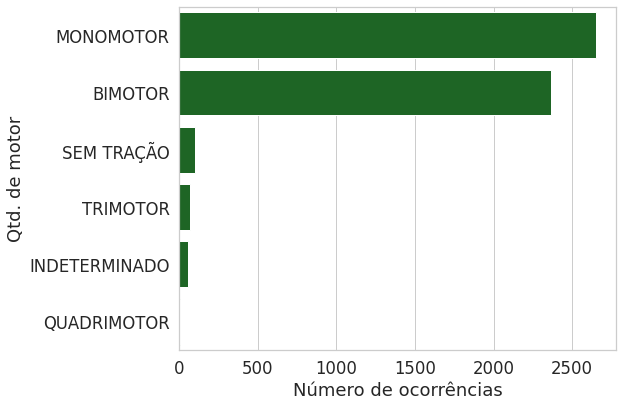

In [ ]:
loc_list = Counter(cenipaOcorrencias['aeronave_motor_quantidade'])
tipo2 = sorted(loc_list, key = loc_list.get, reverse = True)
events = sorted(list(loc_list.values()), reverse = True)

sns.set(style="whitegrid",font_scale=1.5)
sns.set_color_codes("dark")
fig = plt.figure(figsize=(9, 6))
sub3 = fig.add_subplot(111)
sns.barplot(x=events[:20], y=tipo2[:20], color='g', ax=sub3)
texts = sub3.set(ylabel="Qtd. de motor", xlabel="Número de ocorrências")
plt.tight_layout(w_pad=4, h_pad=3)

## <font color='Tomato'><b>Explicação</b></font>

O monomotor está entre os três modelos de aviões que mais caíram no Brasil desde
2008, segundo dados do Centro de Investigação e Prevenção de Acidentes
Aeronáuticos (Cenipa), os modelos 3 modelos destacados são: Monomotor, Bimotor
e sem tração.<br><br>

Houve 39 mortes com o CESSNA 210, que deixou de ser fabricado na década de
<font>1980</font>. De 2008 a 2018 houve 1.286 acidentes envolvendo aviões no país. A maioria
dos acidentes se deve à <b>falha de motor</b> em voo e à <b>perda de controle</b> em voo.<br><br>

Por curiosidade, Aviões de pequeno porte com esse tipo de motor, foi utilizado no
acidente do falecido candidato à presidência Eduardo Campos (PSB) e a falecida
cantora <font color='DeepPink'><b>Marilia Mendonça</b></font>. Este tipo de aeronave se envolve em mais acidentes e
matam mais no Brasil.
Mas, pelo menos no Brasil, são aeronaves como a de Eduardo Campos, que não
realizam voos comerciais regulares, que respondem por 98% dos acidentes.<br><br>

Exemplo do modelo:

<img src='https://s2.glbimg.com/T9110C1aZJROCFQIPenON9EV3Ds=/696x390/smart/filters:cover():strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2018/I/L/Ak4cBySt6ArwWDmVvTeg/queda-aviao-casa-verde-2.jpg'/><br><br>

Os dados estão em um levantamento feito pelo Cenipa, órgão de investigação de
aviação do país, com base em acidentes de 2003 a 2012.<br><br>

O balanço mostra que, dos 1.026 acidentes ocorridos neste período, apenas 2%
envolviam companhias que fazem voos regulares, com aviões maiores. A maioria
destes acidentes foi com táxis-aéreos, aeronaves agrícolas e de instrução de voo



## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
aero_motor_qtd = cenipaOcorrencias['aeronave_motor_quantidade']
aero_motor_qtd_counts = aero_motor_qtd.value_counts()

print('+-----------------------------+')
print('| Média => ', round(aero_motor_qtd_counts.mean(), 2))
print('| Moda => ', sts.mode(aero_motor_qtd))
print('| Mediana => ', sts.median(aero_motor_qtd_counts))
print('| Desvio padrão => ', round(sts.stdev(aero_motor_qtd_counts)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  873.67
| Moda =>  MONOMOTOR
| Mediana =>  84.5
| Desvio padrão =>  1268
+ ----------------------------+


# **Variável de análise: <font color='Lime'>aeronave_fase_operacao</font>**

## <font color='Tomato'><b>Gráfico</b></font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f284999d310>],
      dtype=object)

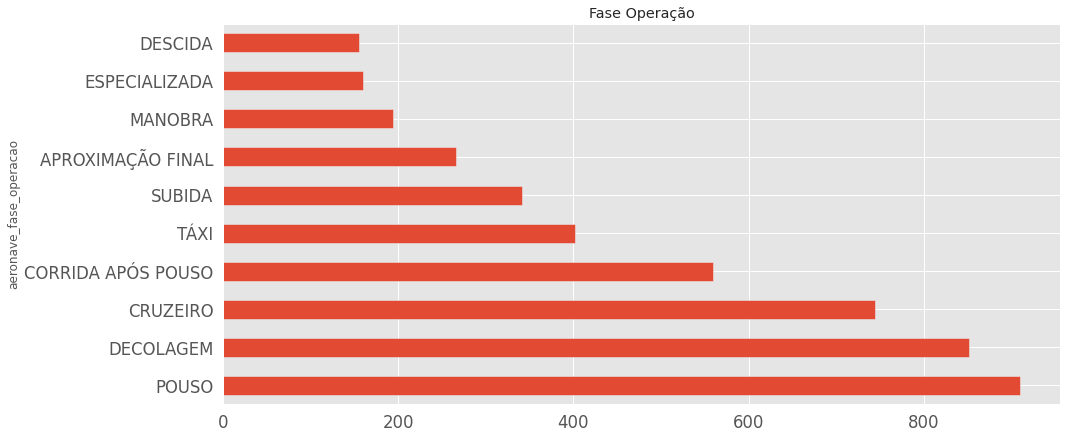

In [ ]:
fase_operacao = cenipaOcorrencias.groupby('aeronave_fase_operacao')['codigo'].count().sort_values(ascending=[False])[:10]
fase_operacao

# Plotando a quantidade de ocorrências por fase da operacao
plt.style.use("ggplot")
fase_operacao.plot(kind='barh', subplots=True, label="Fase Operação" ,figsize=(15, 7))

## <font color='Tomato'><b>Explicação</b></font>

Neste módulo falaremos sobre a quantidade e motivos das ocorrências por fases da
operação.
Com destaques para as fases de pouso e decolagem<br><br>

- <b>Pouso</b>: É a fase que concentra o maior número de registros, respondendo por
cerca de +800 no total, quando se consideram conjuntamente o pouso e a
corrida após o pouso. Embora muitas dessas ocorrências não sejam
catastróficas, cerca de metade delas causam danos significativos à aeronave
e/ou lesões aos passageiros e tripulantes, e outras que resultam também em
prejuízos e lesões a terceiros em solo. Esse acidente é caracterizado como
overrun, que é quando a aeronave ultrapassa os limites finais da pista, é o
acidente que o piloto não pode parar o avião antes da extremidade final.<br><br>
- <b>Decolagem</b>: Cerca de 80% de todos os acidentes identificados durante ou
depois da decolagem são frequentemente identificados como resultado de
erro humano. Uma análise de 1 843 acidentes aéreos desde 1950 até 2006
determinou as seguintes causas, excluindo-se ocorrências militares, voos
privados e voos charters:<br><br>

<b>» 53%</b>: Erro do piloto;<br>
<b>» 21%</b>: Falhas estruturais;<br>
<b>» 11%</b>: Clima/tempo;<br>
<b>» 8%</b>: Outros erros humanos (erro do controle de tráfego aéreo, imperícia no
carregamento, imperícia na manutenção, contaminação de combustível, erro de
comunicação, etc);<br>
<b>» 6%</b>: Sabotagem (bombas, sequestros, abatimentos);<br>
<b>» 1%</b>: Outras causas.<br><br>

As aeronaves nunca batem por causa de uma única questão. É quase sempre uma
combinação de fatores que levam a um acidente e, portanto, é muito difícil fornecer
estatísticas precisas sobre o que é a causa de um acidente de avião. Por exemplo,
se a aeronave sofrer um problema técnico sério (mas que não deve resultar na
perda de uma aeronave) e, posteriormente, é manuseado indevidamente pelos
pilotos, resultando em um acidente, isso conta como erro piloto ou avaria mecânica?
A ruptura mecânica por conta própria não deveria ter significado que o avião caiu,
mas poderia ter sido manipulado corretamente pelos pilotos.<br><br>

Portanto, as estatísticas das causas de falhas de aeronaves nem sempre são claras.
Na área da aviação, isso é chamado de “Modelo de queijo suíço”. Se você imagina
muitas fatias diferentes de queijo suíço, de diferentes blocos de queijo, todos
alinhados um ao lado do outro, as chances são de que você não poderá ver todo o
caminho através de um dos buracos, pois os buracos serão todos em lugares
diferentes. Cada fatia de queijo representa um fator individual, como fadiga, mau
tempo ou mau padrão de treinamento. Em raras ocasiões, todos os furos se alinham
juntos, ou seja, todos os fatores se juntam para causar um acidente<br><br>

<img src='https://www-flightdeckfriend-com.exactdn.com/wp-content/uploads/2017/01/e9c0a4_249e4337abdd4a329abf2770ab209430mv2.png.webp?strip=all&lossy=1&quality=80&ssl=1' />



## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
aero_fase_operacao = cenipaOcorrencias['aeronave_fase_operacao']
aero_fase_operacao_counts = aero_fase_operacao.value_counts()

print('+-----------------------------+')
print('| Média => ', round(aero_fase_operacao_counts.mean(), 2))
print('| Moda => ', sts.mode(aero_fase_operacao))
print('| Mediana => ', sts.median(aero_fase_operacao_counts))
print('| Desvio padrão => ', round(sts.stdev(aero_fase_operacao_counts)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  163.81
| Moda =>  POUSO
| Mediana =>  36.5
| Desvio padrão =>  257
+ ----------------------------+


# **Variável de análise: <font color='Lime'>aeronave_nivel_dano</font>**

## <font color='Tomato'><b>Gráfico</b></font>

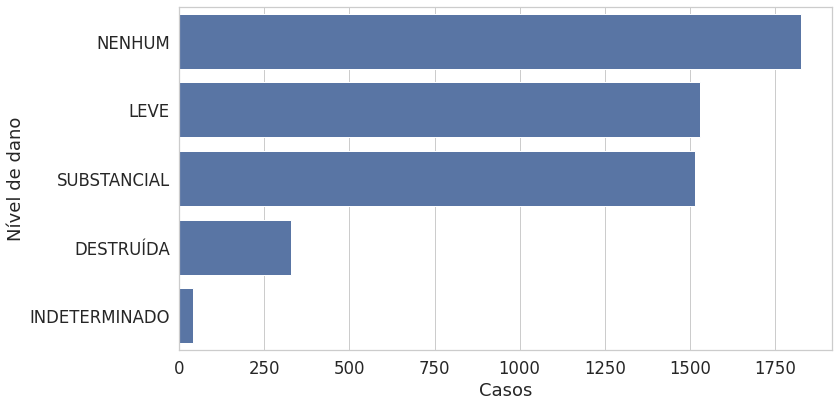

In [ ]:
fase_count = Counter(cenipaOcorrencias['aeronave_nivel_dano'])
fase = sorted(fase_count, key = fase_count.get, reverse = True)
count = sorted (list(fase_count.values()), reverse = True)

sns.set(style="whitegrid",font_scale=1.5)
fig = plt.figure(figsize=(12, 6))
sub3 = fig.add_subplot(111)
sns.barplot(x=count[:20], y=fase[:20], color='b', ax=sub3)
texts = sub3.set(ylabel="Nível de dano", xlabel="Casos")
plt.tight_layout(w_pad=4, h_pad=3)

## <font color='Tomato'><b>Explicação</b></font>

Neste módulo, iremos ver os níveis de dano na aeronave, qual a intensidade sobre
elas e o que foi constatado depois da averiguação do Cenipa( Centro de
Investigação e prevenção de Acidentes aeronáuticos).<br><br>

Como vimos em alguns documentos anteriores, os Acidentes aéreos podem ser
ocasionados por N motivos, desde o mais simples problema como uma poça d’água
na pista, como uma falha de grau alto por exemplo falha no motor ou asa. E em
nenhuma das hipóteses gostaríamos de passar por uma situação dessa, não é
mesmo? Entretanto as aeronaves ainda são construídas e comandas por seres
humanos, e é inevitável que ocorra acidentes o tempo todo, apesar de ser o meio de
locomoção considerado o mais seguro do mundo.<br><br>

Como podemos ver no gráfico, o nível de dano que aparece é nenhum ou seja, na
maioria dos voos realizados por diversas empresas de transporte aéreo ao longo
fosse anos, a maioria consegue êxito em seu planejamento e realização. Abaixo
temos o os valores sobre grau leve, que chegam até 1.500 aeronaves com o nível de
dano leve, sendo eles (ex: uma colisão ocasionada por um pequeno problema, mas
que não resultou em mortes ou avarias tão graves). <br><br>

Temos o dano Substancial, no qual chega a 1.500 aeronaves, que se aplica à uma
estrutura danificada em determinada área, apesar de parecer algo mínimo quando
falamos em aviões destruídos, o dano Substancial deve ser considerado grave ( ex:
um avião se choca em um determinado objeto sendo ele no chão em altitude, e leva
uma avaria em suas asas, é o bastante para o piloto perder o controle e acabar 
colidindo ao solo) o que levaria pessoas a morte ou sérios danos aos ser humano. E
por último, temos o termo destruída, que faz jus ao seu nome, seria quando a
aeronave se colide no ar ou ao solo, e acaba sendo totalmente danificada ou
podemos usar o termo “destroçada”. Esse tipo de acidente tem aproximadamente
260 á 270 casos, aparenta ser pouco não é mesmo? Porém, levando em conta que
nesse tipo de ocorrência á milhares de pessoas utilizando o transporte, acaba sendo
um grande desastre.<br><br>

 Por fim, vimos nesse módulo a quantidade de acidentes por seu nível de dano,
suas interferências do porque acaba acontecendo e dando ao leitor uma breve
explicação sobre o tema realizado.

## <font color='Tomato'><b>Cálculos</b></font>

In [ ]:
aero_nivel_dano = cenipaOcorrencias['aeronave_nivel_dano']
aero_nivel_dano_counts = aero_nivel_dano.value_counts()

print('+-----------------------------+')
print('| Média => ', round(aero_nivel_dano_counts.mean(), 2))
print('| Moda => ', sts.mode(aero_nivel_dano))
print('| Mediana => ', sts.median(aero_nivel_dano_counts))
print('| Desvio padrão => ', round(sts.stdev(aero_nivel_dano_counts)))
print('+ ----------------------------+')

+-----------------------------+
| Média =>  1048.4
| Moda =>  NENHUM
| Mediana =>  1515
| Desvio padrão =>  804
+ ----------------------------+


# <b>CORRELAÇÕES ENTRE VARIÁVEIS <br><font color='Crimson'>estado + tipo</font><br><font color='Crimson'>estado + aeronave_liberada</font></b>

## <font color='Tomato'><b>Gráfico</b></font>

In [ ]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE', 'INCIDENTE']

dic_01 = {i: [ len([k for k in list(cenipaOcorrencias.loc[cenipaOcorrencias['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['tipo'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

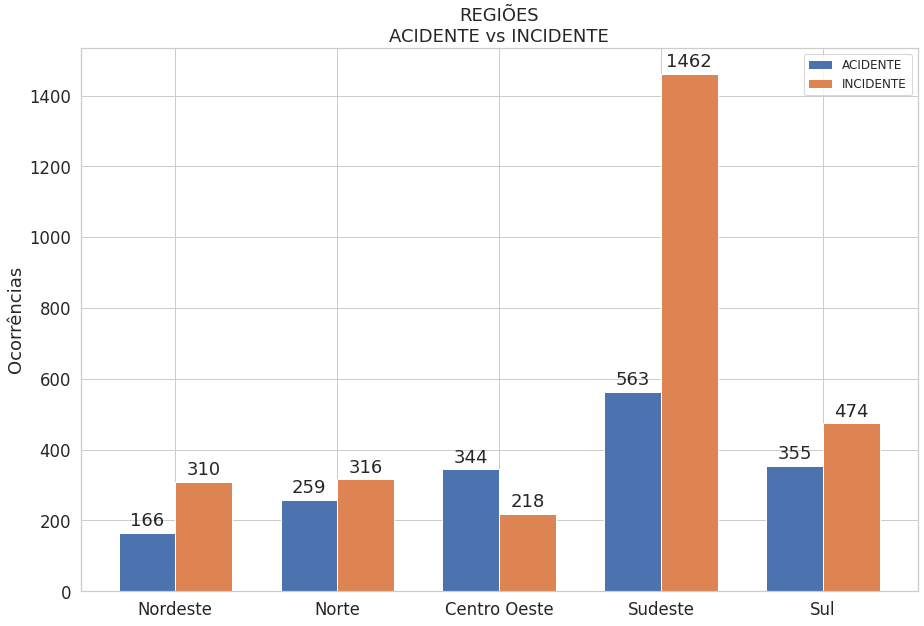

In [ ]:
def numero_em_cima(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

x = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(x - width/2, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
rects2 = ax.bar(x + width/2, dados_regioes['INCIDENTE'], width, label='INCIDENTE')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE', )
ax.set_xticks(x)
ax.set_xticklabels(dados_regioes['tipo'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)
plt.legend(fontsize=12)
plt.show()

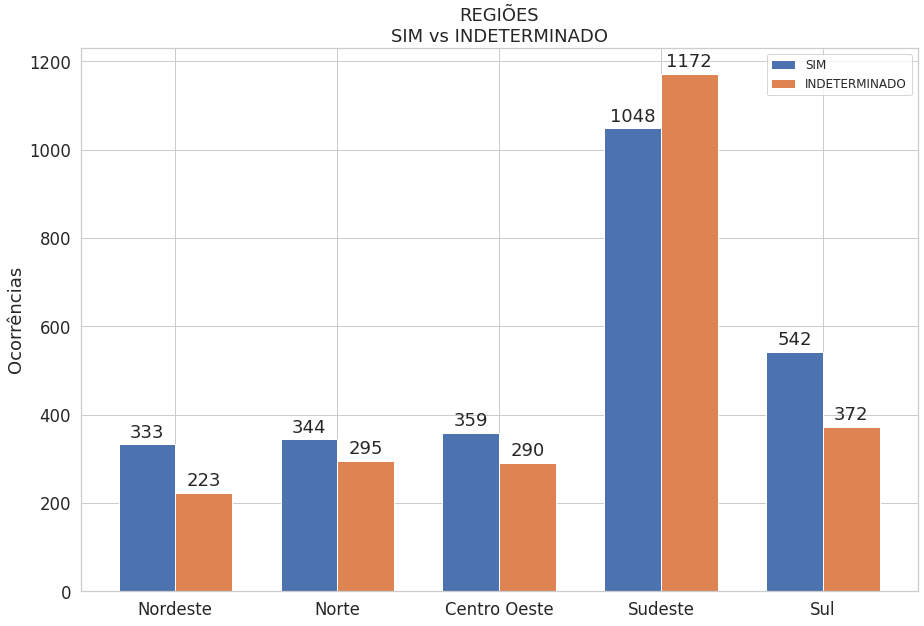

In [ ]:
tipos = ['SIM', 'INDETERMINADO']

dic_01 = {i: [ len([k for k in list(cenipaOcorrencias.loc[cenipaOcorrencias['aeronave_liberada'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['aeronave_liberada'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)
dados_regioes

x = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(x - width/2, dados_regioes['SIM'], width, label='SIM')
rects2 = ax.bar(x + width/2, dados_regioes['INDETERMINADO'], width, label='INDETERMINADO')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nSIM vs INDETERMINADO', )
ax.set_xticks(x)
ax.set_xticklabels(dados_regioes['aeronave_liberada'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)
plt.legend(fontsize=12)
plt.show()

## <font color='Tomato'><b>Explicação -> tomada de decisão</b></font>

Correlação significa relação mútua entre dois termos. Correlacionar, portanto,
significa estabelecer uma relação. Dessa forma, o método de correlação linear, é
utilizado para estudar o comportamento conjunto de duas variáveis quantitativas.<br><br>

Estudar a correlação entre variáveis é uma importante fonte para o entendimento de
um problema e uma maneira de encontrar possíveis soluções e tomar decisões.
Existem maneiras distintas de estudar o comportamento conjunto entre duas
variáveis. Uma forma bastante funcional é a plotagem de um diagrama de dispersão,
onde visualmente se observa a relação entre as variáveis. No entanto, utilizando
apenas recursos visuais a única coisa que podemos observar é a relação entre as
variáveis.
<br><br>

Quando medimos duas variáveis relacionadas a um mesmo problema, geralmente
estamos interessados no estudo da relação entre as variáveis.
<br><br>

A ideia é tentar encontrar alguma relação dessas variáveis. Encontrando esta
relação podemos encontrar uma maneira de melhorar a tomada de decisões, no
caso do nosso projeto.<br><br>

No nosso projeto, fizemos dois gráficos correlacionando algumas variáveis que
achamos que se relacionam e podem trazer informações que melhore a tomada de
decisão para o futuro, com relação aos acidentes aéreos.
<br><br>

Analisando o gráfico 1, podemos perceber que a maioria dos incidentes e acidentes
aéreos ocorreram na região sudeste do Brasil.<br><br>

Analisando o gráfico 2, também existe uma falta de administração maior que nos
outros estados visto que existem mais casos de aeronaves que não se sabe ao certo
se foram liberadas ou não.<br><br>

Procurando uma resposta para os fatos, São Paulo figura como o Estado em que mais
se registrou acidentes aéreos nesse período. A maior causa dos acidentes é por 
Operação a baixa altitude, de acordo com o Cenipa (Centro de Investigação e
Prevenção de Acidentes Aeronáuticos). Operação a baixa altitude trata-se de uma
colisão ou quase-colisão com obstáculos, objetos e terreno durante operação próxima
da superfície, exceto nas fases de decolagem e pouso. Os voos a baixa altitude são
realizados em demonstração aérea, busca e salvamento e aplicação de defensivos
agrícolas.<br><br>

De acordo com a base de dados do IPTU de 2017, da Prefeitura de São Paulo, a
capital paulista tem 53 mil prédios, além de ser uma das cidades com as principais
rotas do país.<br><br>

Quando se está em alta altitude, o tempo de reação para um problema é maior, a
velocidade da aeronave é maior. Quando se está em baixa altitude, é o contrário. A
velocidade é menor, assim como o tempo de reação. Por isso, é mais difícil de
controlar a situação nesses momentos.<br><br>

Para pensar em diminuir os problemas apresentados nos gráficos e auxiliar na tomada
de decisão, seria viável uma melhor administração dos registros de liberação de
aeronaves, e também rever melhores rotas para sobrevoar a região, visto que, foram
feitas há bastante tempo, e, com a verticalização da própria região, algumas rotas
podem estar com conflitos e mais difíceis de serem sobrevoadas.<br><br>


# <b><font color='MediumTurquoise'>BREVE INTRODUÇÃO DAS BIBLIOTECAS </font></b>

1. <font color='Tomato'><b>PANDAS</b></font>

Pandas é uma das bibliotecas mais usadas, dentro da Data Science, do python. Se 
estiver se perguntando do porquê, talvez, não a conhecer, te digo: Existem mais de 
137.000 bibliotecas e 198.826 pacotes de Python disponíveis para simplificar a 
programação. Quem não trabalha com ciência de dados, pode parecer novidade.<br><br>

<font color='Gold'>**ESTRUTURA DE DADOS**</font><br><br>

Os dois objetos basilares da biblioteca Pandas são as series e os DataFrames.
Uma série pode ser chamada também de matriz unidimensional, bastante parecida 
como uma coluna do Excel
Se tratando do DataFrame, ele já é mais parecido com a estrutura de planilha do 
excel, ou seja, suas linhas e colunas possuem rótulos.<br><br>

<img src='https://harve.com.br/wp-content/uploads/2021/05/Series-e-dataframe-pandas-python-768x959.png.webp' width='400' height='500'/><br><br>

Imagine que você tenha um arquivo CSV contendo inúmeros registros, como 
aconteceu no tema usado em nosso trabalho (Ocorrências CENIPA), você irá 
precisar agrupar, filtrar, contabilizar, etc. Com esta biblioteca você não só pode fazer 
isso, mas consegue de maneira muito simples. Veremos abaixo alguns comandos 
que usamos em nosso projeto e o que podemos obter de resultado.<br>
<img src='https://i.imgur.com/sBnz7vb.png' /><br>
Com o read_csv, podemos indicar onde está o nosso arquivo para podermos jogar 
todos os milhares de informações, tudo dentro de uma variável.<br><br>
Em seguida, com um simples comando, obtivemos um gráfico com linhas e colunas 
que, claro, trazendo somente os 5 primeiros registros para um pré-visualização do 
que temos lá.<br>
<img src='https://i.imgur.com/3Dllhrh.png' /><br><br>
<b>COMANDOS ADICIONAIS</b><br>
Um próximo comando usado foi o value_counts(). Bem, o próprio nome já entrega a funcionalidade. Esclarecendo de maneira breve, imagine uma lista contendo valores repetidos, com esta função do Pandas, podemos somar todas as vezes que apareceu aquela palavra ou número. Sabendo disso, você já deve imaginar que usamos isso em quase todos os gráficos, certo? Se pensou, você está correto!<br><br> 

Vamos ver agora um comando muito poderoso desta biblioteca: <b>describe().</b> Quer ter alguns cálculos importantes, de maneira rápida? Use este comando. Coloque como parâmetro uma lista de números. Ok, mas quais números? Lembra do <b>value_counts?</b> Podemos utilizar para somar as repetições que contém numa determinada coluna, e, portanto, jogar no describe.<br>
<img src='https://i.imgur.com/6MgwK1K.png' /><br><br>

Aqui, obtemos o resultado dos cálculos da soma de INCIDENTES, ACIDENTES E INCIDENTES GRAVES. Mas o que significa, por exemplo, <b>std?</b> Veja agora um pequeno dicionário de cada um: <br><br>

- count: contagem das observações<br> 
- mean: média<br> 
- std: desvio padrão<br> 
- min: mínimo<br> 
- 25%: quartil Q1 (até 25%)<br> 
- 50%: quartil Q2 (até 50%)<br>
- 75%: quartil Q3 (até 75%)<br> 
- max: máximo<br><br> 

Caminhando somente na superfície, será que aqui já deu pra mostrar o quão poderoso é esta ferramenta (Pandas)?<br><br>

2. <font color='Tomato'><b>SEABORN</b></font>
<br><br>

<b>Seaborn</b> é uma biblioteca de visualização de dados Python baseada em matplotlib (Que iremos ver no tópico 3). Podemos dizer que se trata de uma biblioteca que pode cuidar, especificamente, do estilo do gráfico. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Poderíamos estilizar todos os gráficos com a própria <b>matplotlib.pyplot</b>, que foi a qual mais utilizamos. Mas para fins de aprendizagem, mesclamos com essa, pois assim nós conhecemos mais e, portanto, podemos trazer a vocês.<br>

<img src='https://i.imgur.com/1BbJu8S.png'/><br><br>

Vamos mencionar aqui os 3 comandos que colocamos neste gráfico, referente à SEABORN, e entender o que cada um faz.<br><br> 

- sns.set(style="whitegrid", font_scale=1.5)<br> 
- sns.set_color_codes("dark")<br>
- sns.barplot()<br><br> 

Dentro do Set(), podemos colocar diversos parâmetros para editar as propriedades do gráfico.<br><br>  

Já no Set_color_codes(), refere-se a Paleta de origem marinha nomeada para ser usada como fonte de cores das barras. Temos outras, também: deep, muted, pastel, dark, bright, colorblind.<br><br> 

Por último: barplot(). Mostra estimativas de pontos e intervalos de confiança como barras retangulares. 
Sendo x, y, as principais: nomes de matiz de variáveis em dados vetoriais, opcional<br><br>

3. <font color='Tomato'><b>MATPLOTLIB.PYPLOT</b></font>
<br><br>

Agora entramos, no que eu costumo dizer, a prática da brincadeira, isto é, após a coleta de dados, ter filtrado e ajustado como queremos realizar a análise, com essa biblioteca, iremos criar os gráficos. Eu sei, você quer entrar de cabeça nos códigos e poder visualizar a mágica acontecer. Mas antes, vamos conhecer, e prometo ser breve, a parte conceitual.<br><br> 

Quando estamos apresentando resultados, além dos números, podemos nos utilizar de outros elementos para passar melhor a mensagem. Uma boa forma de apresentar dados é utilizando a biblioteca <b>matplotlib</b>.<br>
<img src='https://i.imgur.com/l1lidMZ.png'><br><br>

Esta planilha acima é agradável de visualizar se há quedas ou se obtivemos lucro? Olha, se tratando de poucas variáveis, pode ser que seja simples, mas concorda que é um trabalho braçal? E com isso, podemos ir mais além: pegar mais meses, ou separar por semanas e até dias, dependendo do escopo do seu negócio. Como você faria essa análise? Se for manual, declara-se falido, pois até tivermos todos os resultados talvez seja tarde. Mas não com matplotlib. Podemos com ela, alcançar de pequenos a grandes gráficos. Ah! e um detalhe: sem muita enrolação.<br><br>  

meses = <b>['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']</b><br> 
valores = <b>[105235, 107697, 110256, 109236, 108859, 109986]</b> 
<br><br>

Inserimos, nas duas listas acima, os valores respectivos. Ok, você pode estar falando, agora, que trocamos 6 por meia dúzia, já que inserimos de maneira manual os valores. Apenas para métodos didáticos.<br><br>

<b>matplotlib.pyplot.plot</b>(meses, valores)<br> 
isto é, plote y versus x como linhas e / ou marcadores. Mas não só isso, O plot é um método bem poderoso que permite a definição de vários parâmetros, como a cor da linha, o tipo de marca utilizada em cada ponto, tipo da linha, etc.<br><br> 

<b>matplotlib.pyplot.show()</b><br><br> 

Este, portanto, seria o comando final. Sinalizando para mostrar a tabela 
<br>
<img src='https://i.imgur.com/jy5yCG8.png' /><br><br>

Doido, né? Com poucos e simples códigos, conseguimos exibir um gráfico e obter uma visualização bem mais limpa.<br> 

Acredite, eu tirei água do oceano com um balde pequeno. Essa ferramenta é um universo. <br><br>

<font color='Gold'><b>APLICAÇÕES</b></font>
<br><br> 

Iremos mostrar algumas funções que usamos em nosso desenvolvimento e o resultado que tivemos com isso<br><br> 

plt.figure(figsize=(8, 6), dpi=80)<br>
plt.bar(grupos, valores)<br> 
plt.xlabel('Períodos do dia', color='black', )<br> 
plt.ylabel('Casos', color='black')<br> 
plt.grid(False)<br> 
plt.show()<br><br> 

Em nosso gráfico onde levantamos o período do dia onde acontecem mais acidentes, utilizamos, num determinado momento, os códigos acima. Vamos entender cada um?<br><br>

<b>Figure</b>=()<br> 
Largura, altura em polegadas. <br><br>

<b>Dpi</b>=80<br> 
A resolução da figura em pontos por polegada. <br><br>

Logo abaixo temos a função bar que recebemos os grupos (manhã, tarde, noite, madrugada) e os valore, respectivamente.<br><br> 

Xlabel e Ylabel, sendo os títulos representantes de cada vetor<br><br> 

Grid(false) é basicamente uma grade de fundo para elucidar bem as barras e seus valores. Não são somente valores Booleanos, indicando true, você pode mencionar alguns tipos, basta checar a documentação. <br><br>

E, novamente, o show.<br><br> 

E assim tivemos o seguinte gráfico: <br>
<img src='https://i.imgur.com/QAofMCH.png' /><br><br>

Vamos, por final, mostrar um gráfico de pizza, que acaba sendo até mais simples.<br><br> 

<font color='LightGreen'>Dados em números na parte Externa</font>
<br> 
recipe = [incidente.count("INCIDENTE"), acidente.count("ACIDENTE"), incidenteGrave.count("INCIDENTE GRAVE")]<br><br> 

<font color='LightGreen'>Gráfico</font> 
<br>
grafico = cenipaOcorrencias['tipo'].value_counts().plot(kind='pie', label="", fontsize = 17, shadow=True, autopct='%1.1f%%',figsize=(7,7)) 
<br><br>
grafico.legend(recipe)grafico.set_title("Tipos de acidentes")
<br><br>

Vamos entender o que é cada um aí. <br><br>

Na variável recipe, que é uma lista, estamos armazenando os valores da quantidade de acidentes, incidentes e incidentes graves. Apenas para servir como legenda em <b>legend()</b>. 
<br>
O principal mesmo está na variável gráfico. Nela, está ocorrendo um <b>value_counts()</b>, isto é, ele irá somar todas as vezes que aparece a string ‘INCIDENTE’, por exemplo.<br><br>  

Logo em seguida, ele plota o gráfico colocando algumas características nele. <b>Kind=’pie’</b> indica que será redonda (ou como chamamos aqui: pizza).  
<br>
Indicando o tamanho das palavras/números com fontsize (pra quem já estudou css consegue ver similaridades).  
<br><br>
<b>Shadow=true</b> indica que haverá uma leve sombra (você verá quando mostrarmos).  
<br><br>
<b>autopct</b> quer dizer para colocar as porcentagens dos respectivos valores.  
<br><br>

E como já havíamos visto antes, <b>figsize</b>: destinando o seu tamanho. 
<br>
O resultado, portanto: <br>
<img src='https://i.imgur.com/wXNuzA2.png' /><br><br>

Apesar de deixarmos as referências logo abaixo, atenta-se que as principais informações estão na própria documentação: <br>

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html <br>

# <b><font color='LightSlateGray'>REFERÊNCIAS</font></b>

Guilherme Werneck. **MOKI**. 26 de fevereiro de 2021. **Qual a diferença entre
acidente e incidente? Veja cada definição**. Disponível em:
< https://site.moki.com.br/diferenca-acidente-incidente/ >. Acesso em 22 nov. 2021.<br><br>

Redação Super. **Superinteressante**. 6 de novembro de 2019. **O maior acidente
aéreo de todos os tempos**. Disponível em: < https://super.abril.com.br/historia/omaior-acidente-aereo-de-todos-os-tempos/ >. Acesso em 26 nov. 2021.<br><br>

**ACIDENTES E INCIDENTES AÉREOS**. In: **WIKIPÉDIA**, a enciclopédia livre. Flórida:
Wikimedia Foundation, 2021. Disponível em: <
https://pt.wikipedia.org/wiki/Acidentes_e_incidentes_a%C3%A9reos >. Acesso em:
18 nov. 2021.<br><br>

MURILO BASSETO. **Aeroin**. 15 de outubro de 2021. **Motor de Boeing 767 falha na
decolagem e incidente fecha o aeroporto por horas**. Disponível em: <
https://www.aeroin.net/motor-de-boeing-767-falha-na-decolagem-e-incidente-fechao-aeroporto-por-horas/ >. Acesso em 11 nov. 2021.<br><br>

JULIANO GIANOTTO. **Aeroin**. 5 de novembro de 2021. **Pilotos desviam voo por
falta de combustível, mas avião não chega ao aeroporto escolhido**. Disponível
em: < https://www.aeroin.net/pilotos-desviam-voo-por-falta-de-combustivel-masaviao-nao-chega-ao-aeroporto-escolhido/ >. Acesso em 12 nov. 2021.<br><br>

Alexandre Saconi. **Uol**. 20 de julho de 2019. **Como funciona a investigação de um
acidente aéreo?** Disponível em: <
https://economia.uol.com.br/noticias/redacao/2019/07/20/investigacao-acidenteaereo-caixa-preta.htm >. Acesso em 23 nov. 2021.<br><br>

Carlos Ferreira. **Aeroin**. 29 de maio de 2021. **Piloto dorme durante voo e acorda a
110 quilômetros do destino original**. Disponível em: <
https://www.aeroin.net/piloto-dorme-durante-voo-e-acorda-a-110-quilometros-dodestino-original/ >. Acesso em: 19 nov. 2021.<br><br>

sem autor. **LIBERFLY**. 23 de agosto de 2021. **Quais são os melhores horários
para viajar?** Disponível em: < https://blog.liberfly.com.br/melhores-horarios-paraviajar/ >. Acesso em: 17 nov. 2021.<br><br>

Marcos Pivetta. **Pesquisa FAPESP**. ago. 2009. **O risco dos corujões**. Disponível
em: < https://revistapesquisa.fapesp.br/o-risco-dos-corujoes/ >. Acesso em 23 nov.
2021.<br><br>

sem autor. **Jato**. **Turboélice ou Pistão? Saiba como escolher sua aeronave**.
Disponível em: < https://www.chamoneaviacao.com.br/jato-turboelice-ou-pistaosaiba-como-escolher-sua-aeronave/ >. Acesso em 20 nov. 2021.<br><br>

sem autor. **Blog Hangar33**. 19 de fevereiro de 2019. **A IMPORTÂNCIA DA
MANUTENÇÃO PREVENTIVA EM MOTORES A PISTÃO**. Disponível em: <
http://blog.hangar33.com.br/a-importancia-da-manutencao-preventiva-em-motores-apistao/ >. Acesso em 20 nov. 2021.<br><br>

Por G1. **G1**. 30 de novembro de 2018. **Modelo de avião como o que caiu em SP é
um dos que mais se acidentam no Brasil**. Disponível em: <
https://g1.globo.com/sp/sao-paulo/noticia/2018/11/30/aviao-que-caiu-no-campo-demarte-e-um-cessna-c210-fabricado-em-1980.ghtml >. Acesso em 13 nov. 2021.<br><br>

Luiza Bandeira. **BBC**. 13 de agosto de 2014. **Acidentes com aviões pequenos são
mais frequentes e matam mais no Brasil**. Disponível em: <
https://www.bbc.com/portuguese/noticias/2014/08/140813_aviao_pequeno_lab >.
Acesso em 13 nov. 2021.<br><br>

MURILO BASSETO. **Aeroin**. 27 de agosto de 2021. **Entre os 10 maiores
aeroportos do país, Brasília, Congonhas e Confins sobem em julho**. Disponível
em: <
https://www.aeroin.net/entre-os-10-maiores-aeroportos-do-pais-brasilia-congonhase-confins-sobem-em-julho/ >. Acesso em 15 nov. 2021.<br><br>

Juliana Monaco. **Panrotas**. 23 de março de 2021. **São Paulo é o Estado que mais
recebeu estrangeiros em 2019**. Disponível em: < 
https://www.panrotas.com.br/mercado/pesquisas-e-estatisticas/2021/03/sao-paulo-eo-estado-que-mais-recebeu-estrangeiros-em-2019_180443.html >. Acesso em 27
nov. 2021.<br><br>

sem autor. **flightdeckfriend**, **WHY DO PLANES CRASH?** Disponível em: <
https://www.flightdeckfriend.com/ask-a-pilot/why-do-planes-crash/ >. Acesso em 27
nov. 2021.<br><br>

Fernanda Favorito. **Jusbrasil**. 17 de agosto de 2014. **A atividade física adaptada
no continente sul-americano**.
Disponível em: <http:://www.rc.unesp.br/ib/efisica/
sobama/sobamaorg/atividadefisica.pdf>.
Acesso em: 26 nov. 2021.<br><br>

Sérgio Figueiredo. **PVEJAP**. 1 de dezembro de 2020. **PApós 20 meses e dois
acidentes fatais, o Boeing 737 Max voltará a voar**P. Disponível em: <
https://veja.abril.com.br/tecnologia/apos-20-meses-e-dois-acidentes-fatais-o-boeing737-max-voltara-a-voar/ >. Acesso em 28 nov. 2021.<br><br>

Bruna Mulinari. **HARVE**.  24 de maio de 2021. **Pandas Python: vantagens e como começar**. Disponível em: < https://harve.com.br/blog/programacao-python-blog/pandas-python-vantagens-e-como-comecar/ >. Acesso em 29 nov. 2021. <br><br>

Yuri Matheus. **ALURA**. 27 de novembro de 2021. **Matplotlib uma biblioteca Python para gerar gráficos interessantes**. Disponível em: < https://www.alura.com.br/artigos/criando-graficos-no-python-com-a-matplotlib >. Acesso em 29 nov. 2021.<br> 
